# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    # time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | merizo village
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | tralee
Processing Record 8 of Set 1 | vilyuysk
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | ebon
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | brookings
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | raholt
Processing Record 16 of Set 1 | gereida
Processing Record 17 of Set 1 | boa vista
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | bridgewater
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,53.20,88,70,10.58,RU,Wed Sep 11 21:53:35 2024
1,port-aux-francais,-49.3500,70.2167,38.50,86,100,41.14,TF,Wed Sep 11 21:53:35 2024
2,thompson,55.7435,-97.8558,55.56,62,20,2.30,CA,Wed Sep 11 21:52:43 2024
3,ilulissat,69.2167,-51.1000,37.42,70,87,1.14,GL,Wed Sep 11 21:51:59 2024
4,merizo village,13.2658,144.6691,83.98,90,100,25.10,GU,Wed Sep 11 21:53:36 2024


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,53.20,88,70,10.58,RU,Wed Sep 11 21:53:35 2024
1,port-aux-francais,-49.3500,70.2167,38.50,86,100,41.14,TF,Wed Sep 11 21:53:35 2024
2,thompson,55.7435,-97.8558,55.56,62,20,2.30,CA,Wed Sep 11 21:52:43 2024
3,ilulissat,69.2167,-51.1000,37.42,70,87,1.14,GL,Wed Sep 11 21:51:59 2024
4,merizo village,13.2658,144.6691,83.98,90,100,25.10,GU,Wed Sep 11 21:53:36 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [29]:
city_data_df[:2]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,53.2,88,70,10.58,RU,Wed Sep 11 21:53:35 2024
1,port-aux-francais,-49.3500,70.2167,38.5,86,100,41.14,TF,Wed Sep 11 21:53:35 2024


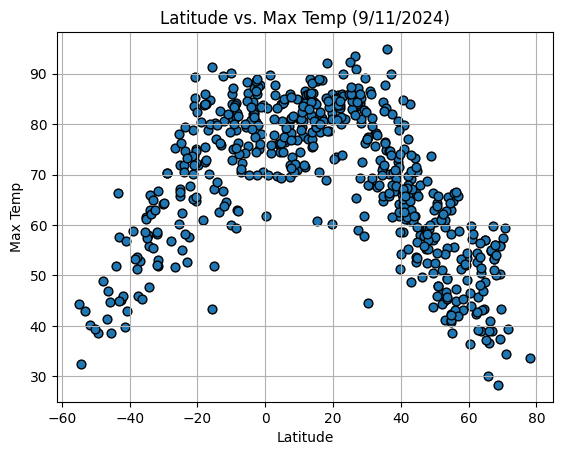

In [40]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat', 'Max Temp', edgecolor = 'black', grid=True, s=40, title='Latitude vs. Max Temp (9/11/2024)', xlabel ='Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

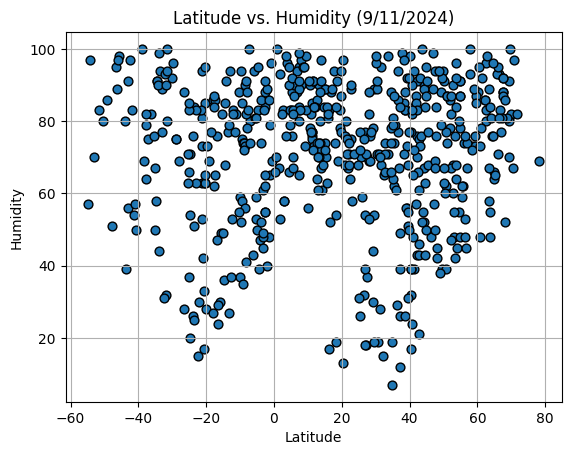

In [41]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat', 'Humidity', edgecolor = 'black', grid=True, s=40, title='Latitude vs. Humidity (9/11/2024)', xlabel ='Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

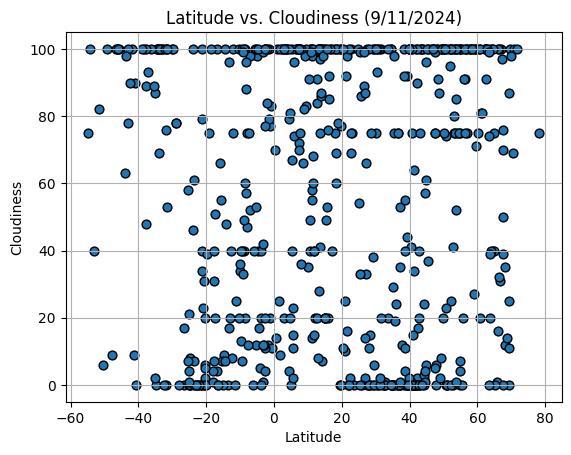

In [42]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat', 'Cloudiness', edgecolor = 'black', grid=True, s=40, title='Latitude vs. Cloudiness (9/11/2024)', xlabel ='Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

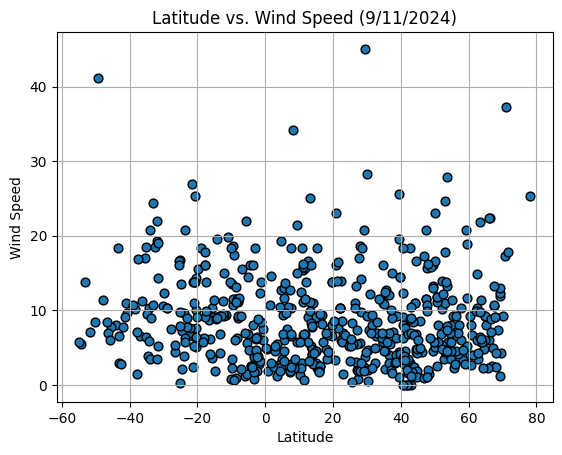

In [43]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat', 'Wind Speed', edgecolor = 'black', grid=True, s=40, title='Latitude vs. Wind Speed (9/11/2024)', xlabel ='Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
 linregress(x,y)

LinregressResult(slope=np.float64(0.02414601222745434), intercept=np.float64(70.89906888690291), rvalue=np.float64(0.0376612412307944), pvalue=np.float64(0.3673547049845255), stderr=np.float64(0.026764877646025628), intercept_stderr=np.float64(0.9693142346183805))

In [89]:
# Define a function to create Linear Regression plots

x = city_data_df.Lat
y = city_data_df.Humidity

def lnReg(x,y, colName):
    slope, intercept, rvalue = linregress(x,y)[:3]
    new_y = x*slope + intercept

    print(f'The r^2 value is: {rvalue}')

    plt.scatter(x, y, edgecolor = 'black', s=40)
    plt.grid()
    plt.title(f'Latitude vs. {colName} (9/11/2024)')
    plt.xlabel('Latitude')
    plt.ylabel(colName)


    plt.annotate(f'y = X{slope:.2f} + {intercept:.2f}', [x.min(),y.min()], color='r', fontsize=14)
    plt.plot(x,new_y, 'r', linewidth = 3);

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,53.20,88,70,10.58,RU,Wed Sep 11 21:53:35 2024
2,thompson,55.7435,-97.8558,55.56,62,20,2.30,CA,Wed Sep 11 21:52:43 2024
3,ilulissat,69.2167,-51.1000,37.42,70,87,1.14,GL,Wed Sep 11 21:51:59 2024
4,merizo village,13.2658,144.6691,83.98,90,100,25.10,GU,Wed Sep 11 21:53:36 2024
6,tralee,52.2704,-9.7026,51.03,82,100,10.20,IE,Wed Sep 11 21:53:36 2024
...,...,...,...,...,...,...,...,...,...
570,rikaze,29.2500,88.8833,57.87,44,38,1.86,CN,Wed Sep 11 21:54:38 2024
571,ghat,24.9647,10.1728,92.23,31,54,3.22,LY,Wed Sep 11 21:54:38 2024
572,qarqaraly,49.4058,75.4742,43.68,79,8,13.06,KZ,Wed Sep 11 21:54:38 2024


In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,53.20,88,70,10.58,RU,Wed Sep 11 21:53:35 2024
2,thompson,55.7435,-97.8558,55.56,62,20,2.30,CA,Wed Sep 11 21:52:43 2024
3,ilulissat,69.2167,-51.1000,37.42,70,87,1.14,GL,Wed Sep 11 21:51:59 2024
4,merizo village,13.2658,144.6691,83.98,90,100,25.10,GU,Wed Sep 11 21:53:36 2024
6,tralee,52.2704,-9.7026,51.03,82,100,10.20,IE,Wed Sep 11 21:53:36 2024


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,38.50,86,100,41.14,TF,Wed Sep 11 21:53:35 2024
5,grytviken,-54.2811,-36.5092,32.52,97,100,5.55,GS,Wed Sep 11 21:53:36 2024
8,pisco,-13.7000,-76.2167,62.65,77,0,9.22,PE,Wed Sep 11 21:53:36 2024
10,punta arenas,-53.1500,-70.9167,42.91,70,40,13.80,CL,Wed Sep 11 21:53:36 2024
11,bredasdorp,-34.5322,20.0403,58.10,91,100,3.91,ZA,Wed Sep 11 21:53:36 2024


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.7988113395106359


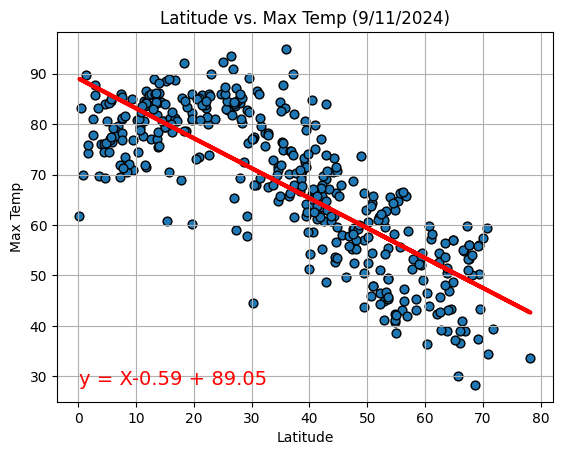

In [95]:
# Linear regression on Northern Hemisphere
lnReg(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Max Temp')

The r^2 value is: 0.8077683550008492


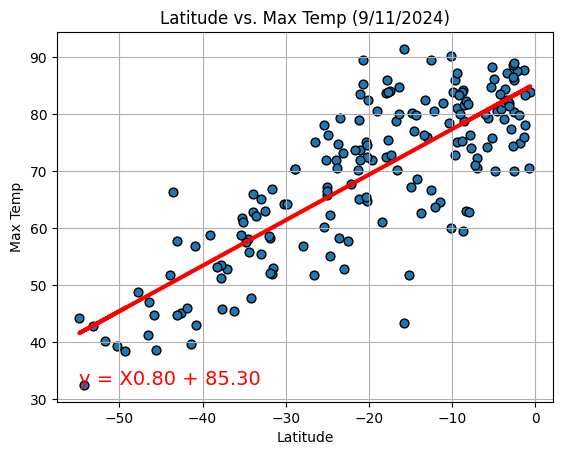

In [96]:
# Linear regression on Southern Hemisphere
lnReg(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: -0.04297236250923363


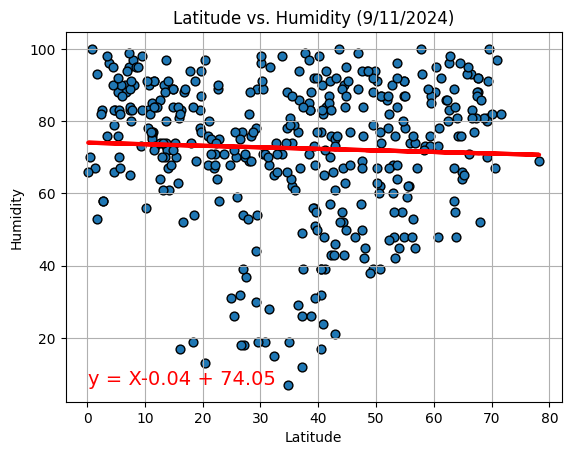

In [97]:
# Northern Hemisphere
lnReg(northern_hemi_df.Lat, northern_hemi_df['Humidity'], 'Humidity')

The r^2 value is: -0.11834851029849958


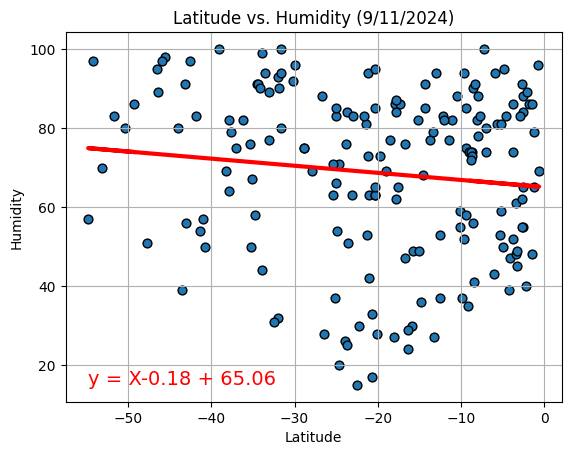

In [98]:
# Southern Hemisphere
lnReg(southern_hemi_df.Lat, southern_hemi_df['Humidity'], 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: -0.031463272856934614


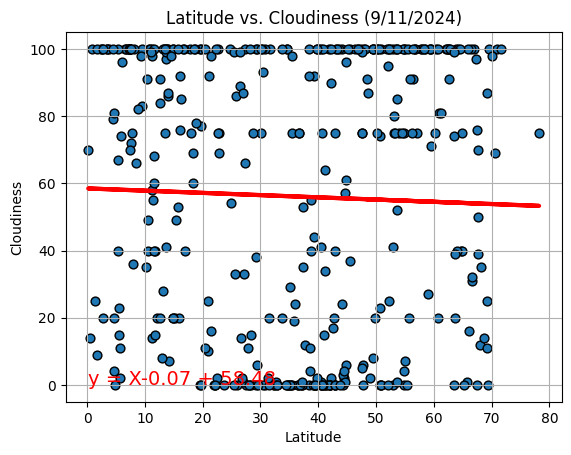

In [99]:
# Northern Hemisphere
lnReg(northern_hemi_df.Lat, northern_hemi_df['Cloudiness'], 'Cloudiness')

The r^2 value is: -0.1958768722238808


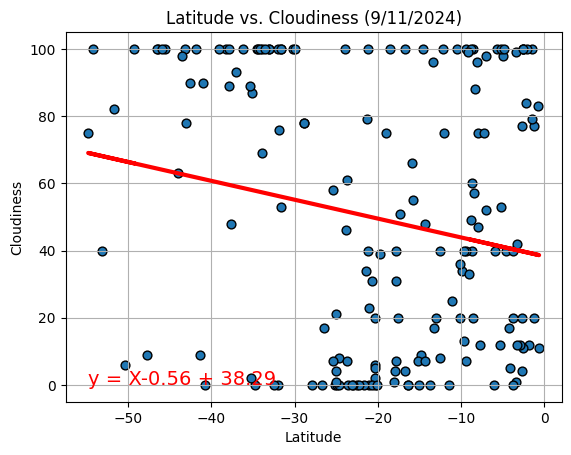

In [100]:
# Southern Hemisphere
lnReg(southern_hemi_df.Lat, southern_hemi_df['Cloudiness'], 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.062312872523641864


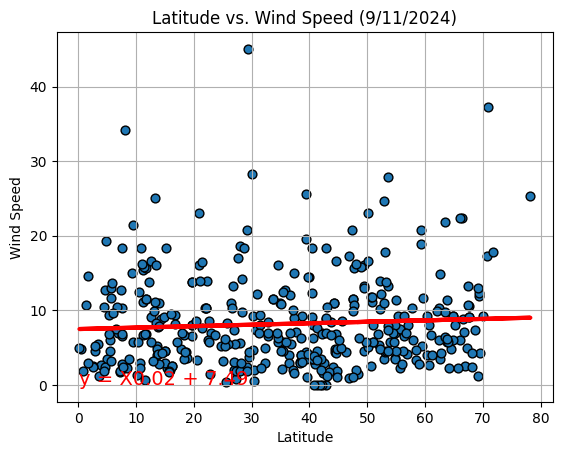

In [101]:
# Northern Hemisphere
lnReg(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Wind Speed')

The r^2 value is: -0.16550712677972093


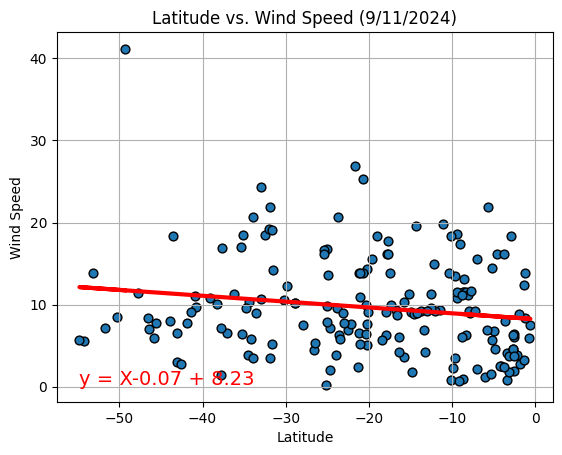

In [102]:
# Southern Hemisphere
lnReg(southern_hemi_df.Lat, southern_hemi_df['Wind Speed'], 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Here is the prove that as we get closer to the Equator temperature gets hottter.  So it is obvious that latitude affects the temperature.  But, it does not affect humidity, cloudiness or wind speed.